Tài liệu này mang giấy phép Creative Commons Attribution (CC BY). (c) Nguyễn Ngọc Sáng, Zhukovsky 06/2019.

[@SangVn](https://github.com/SangVn) [@VnCFD](https://vncfdgroup.wordpress.com/)

*Thực hành CFD với Python!*

# Bài 19. Lưới có cấu trúc, bài toán dòng chảy trên âm qua dốc 

Khi nói tới vấn đề lưới, bạn có thể nghe thấy các từ khác như `chia lưới, dựng lưới, tạo lưới, vẽ lưới`, tất cả chúng đề chỉ việc xây dựng lưới để tính toán. Lưới được chia thành hai dạng cơ bản `có cấu trúc (structured) và không cấu trúc (unstructured)`. 

<img src='img\Bai_19_0.png'>

Điểm cộng của từng loại đó là: việc lưu trữ, sắp xếp lưới có cấu trúc dễ dàng, thuận tiện hơn; thời gian hội tụ nhanh hơn khi dùng lưới có cấu trúc, lưới không cấu trúc có thể chia tự động ngay cả với những vùng tính toán có dạng hình học phức tạp.

Việc xây dựng chương trình tính toán phải dựa trên loại lưới được sử dụng. Trong khuôn khổ phần 3, chúng ta sẽ sử dụng `lưới có cấu trúc`. 

Tạo lưới là một công việc không hề dễ dàng nhất là khi vùng tính toán có dạng hình học phức tạp, khi đó ta phải sử dụng các phần mềm chia lưới có sẵn, trong trường hợp đơn giản ta có thể tự viết code. Lưới tạo ra có thể được lưu ở các định dạng khác nhau tùy chương trình chia lưới. Định dạng chuẩn mà các chương trình CFD đều có thể dùng đó là CGNS (CFD General Notation System). Trong bài này ta sẽ thực hành các thao tác với lưới: `chia lưới, lưu trữ lưới, đọc lưới, biểu diễn lưới`. 

## 1. Bài toán dòng chảy trên âm qua dốc

Ví dụ đầu tiên mà ta sẽ tính là bài toán dòng chảy trên âm qua dốc:
- Kích thước vùng tính toán, điều kiện biên như trên hình
- Thông số dòng chảy vào: $T=293.15, u=660.0, v=0.0, p=101325.0$

<img src='img\Bai_19_1.png'>


## 2. Chia lưới

**Quy ước:** kí hiệu index *j - trục y, i - trục x*.

Trường hợp tổng quát, ta chia vùng tính toán ra thành $(N_j-1) \times (N_i-1)$ ô lưới. Như vậy sẽ có $(N_j \times N_i)$ điểm lưới, mỗi điểm chứa hai giá trị tọa độ (x, y). Ta cần một mảng 3 chiều với kích thước $(N_j \times N_i \times 2$ để chứa tọa độ điểm lưới. Cách đơn giản là sử dụng thư viện *numpy*:

`points = numpy.zeros((N_j, N_i, 2))`. Khi đó `points[j, i]` - điểm ở hàng j, cột i.

**Bài tập:** Hãy chia lưới kích thước 40x100 ô 

Sau khi thực hiện xong bài tập trên, hãy đối chiếu với cách sau:

In [111]:
# coding: utf-8
# module mesh_generator.py 

import  numpy as np
import matplotlib.pyplot as plt

# Tạo lưới bài toán Mach 2
def generate_mesh_M2(Nj, Ni): #Nj, Ni: số điểm lưới 
    # Kích thước vùng tính toán
    ly, lx = 4.0, 10.0
    
    # Tạo mảng 3 chiều để chứa tọa độ các điểm lưới 
    points = np.zeros((Nj, Ni, 2))
    
    # tọa độ x tại các điểm lưới
    dx = lx / Ni
    x = np.linspace(0, lx, Ni)
    
    # tọa độ y của biên dưới
    y0 = np.zeros(Ni)

    # index i tương ứng vị trí x = 2, 4 trên biên dưới
    i2 = int(2./dx)
    i4 = int(4./dx)

    y0[i2:i4] = (x[i2:i4]-2.)*np.tan(np.pi/12)
    y0[i4:] = 2.0*np.tan(np.pi/12)

    # khoảng cách dy giữa hai điểm cùng cột
    dy = np.array([(ly-y)/(Nj-1) for y in y0])
    
    # xác định tọa độ (x, y) của từng điểm 
    for j in range(Nj):
        for i in range(Ni):
            points[j, i, 0] = x[i]
            points[j, i, 1] = y0[i]+j*dy[i]

    return points

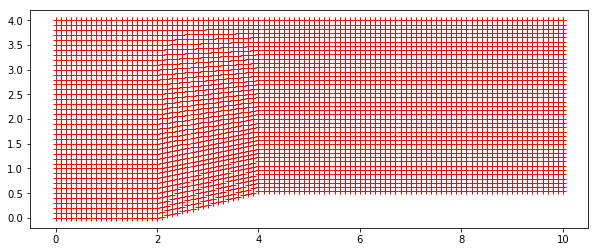

In [113]:
# Kiểm tra hàm chia lưới, vẽ lưới bằng pyplot
Nj, Ni = 41, 101 #kích thước lưới 
points = generate_mesh_M2(Nj, Ni) #tọa độ điểm lưới 
fig = plt.figure(figsize=(10, 4))
plt.plot(points[:, :, 0], points[:, :, 1], 'r+')
plt.show()

# 3. Xuất lưới

Chúng ta sẽ lưu lưới và kết quả ở định dạng của `Tecplot` (tìm hiểu `Tecplot Data Format Guide`). Tuy nhiên ta sẽ sử dụng **ParaView** để xem lưới và kết quả. Bạn hãy cài đặt và học cách sử dụng chương trình này.  Đây là một phần mềm rất tiện lợi cho việc biểu diễn cũng như xử lý kết quả CFD.

Ví dụ file `field.dat` có cấu trúc như sau:

`TITLE = "vncfd python"
VARIABLES = "X", "Y", "Z", "rho", "u", "v", "p", "Mach"
ZONE T="1", I= 100, J= 40, K= 1
0.050000 0.050000 0.000000 1.400000 2.000000 0.000000 1.000000 2.000000
0.150000 0.050000 0.000000 1.400000 2.000000 0.000000 1.000000 2.000000
0.250000 0.050000 0.000000 1.400000 2.000000 0.000000 1.000000 2.000000
...`

- dòng đầu tiên là tên gọi
- dòng thứ hai là tên các biến
- dòng thứ ba là tên, kích thước vùng lưới
- các dòng tiếp theo là giá trị các biến

Ta cần hai hàm xuất lưới và nhập lưới. Thông tin mà ta lưu trữ và đọc là `kích thước và tọa độ lưới`:

In [105]:
# module function.py 
# Hàm xuất lưới
def export_mesh(Nj, Ni, points, file_name):
    f = open(file_name, 'w')
    f.write('TITLE = "vncfd python"\n')
    f.write('VARIABLES = "X", "Y"\n')
    f.write('ZONE T="1", I= %d, J= %d\n' % (Ni, Nj))
    for j in range(Nj):
        for i in range(Ni):
            f.write('%f %f\n' % (points[j, i, 0], points[j, i, 1]))
    f.close()


# Hàm đọc lưới
def import_mesh(file_name, dl=' '):
    print('\nImport mesh from: %s\n' % file_name)
    f = open(file_name, 'r')

    # đọc và hiện ra màn hình 3 dòng đầu
    for i in range(3):
        line = f.readline()
        print(line)

    # lấy giá trị Ni, Nj
    words = line.split()  # chia dòng cuối ra thành các từ riêng biệt bằng dấu cách ' '
    Nj = int(words[-1])  # từ cuối cùng là Nj
    Ni = int(words[-3].replace(',', ''))  # từ thứ 3 tứ cuối lên bỏ dấu ',' là Ni

    f.close()

    # đọc tọa độ các điểm lưới bằng hàm loadtxt, bỏ 3 hàng đầu
    # dùng reshape để chuyển mảng về 3 chiều
    points = loadtxt(file_name, skiprows=3, usecols=(0,1), delimiter=dl).reshape((Nj, Ni, 2))

    return Nj, Ni, points

In [106]:
# Lưu lưới vừa được tạo 
export_mesh(Nj, Ni, points, 'data/mach_2_mesh.dat')

Dùng Paraview để xem, kiểm tra lưới chúng ta vừa ghi.

<img src='img\Bai_19_2.png' width = 600>

In [116]:
# Kiểm tra lại việc ghi, đọc lưới
# # Gọi hàm import_mesh 
# Nj, Ni, points = import_mesh('data/mach_2_mesh.dat')
# # Kiểm tra giá trị Nj, Ni
# print(Nj, Ni)
# # Kiểm tra tọa độ y của cột đầu tiên
# print(points[:, 0, 1])
# # Kiểm tra tọa độ x của hàng đầu tiên 
# print(points[0, :, 0])

Hãy lưu hàm tạo lưới vào module `mesh_generator.py`, hai hàm xuất và đọc lưới vào module `functions.py` trước khi sang bài thực hành mới.

# [Bài 20. Cấu trúc dữ liệu](Bai_20.ipynb)